In [0]:
import numpy as np
import pandas as pd
from datetime import datetime

In [0]:
# Reading morning slot data
MorningData_url = 'https://raw.githubusercontent.com/Ashwin-19/TaxiTripsDataset/master/Morning_dataframe.csv'
MorningData = pd.read_csv(MorningData_url, sep=',', low_memory=False)

# Removing redundant columns from dataset
MorningData = MorningData[['Trip ID', 'Taxi ID', 'Start Month', 'Start Date', 'Start Year',
       'Start Time', 'Start Stamp', 'End Month', 'End Date', 'End Year',
       'End Time', 'End Stamp', 'Trip Seconds', 'Trip Miles',
       'Pickup Community Area', 'Dropoff Community Area', 'Fare', 'Tips',
       'Company']]

In [0]:
# Reading evening slot data
EveningData_url = 'https://raw.githubusercontent.com/Ashwin-19/TaxiTripsDataset/master/Evening_dataframe.csv'
EveningData = pd.read_csv(EveningData_url, sep=',', low_memory=False)

# Removing redundant columns from dataset
EveningData = EveningData[['Trip ID', 'Taxi ID', 'Start Month', 'Start Date', 'Start Year',
       'Start Time', 'Start Stamp', 'End Month', 'End Date', 'End Year',
       'End Time', 'End Stamp', 'Trip Seconds', 'Trip Miles',
       'Pickup Community Area', 'Dropoff Community Area', 'Fare', 'Tips',
       'Company']]

In [0]:
# calculate number 0f weekdays in one year
def weekdays(year=2013):
  '''
  returns number of working days in a year
  '''
  import datetime
  
  n_weekdays=0
  begin_year = datetime.date(year, 1, 1)
  end_year = datetime.date(year, 12, 31)
  one_day = datetime.timedelta(days=1)
  next_day = begin_year

  for day in range(0, 366):
      
      if next_day > end_year:
          break
      
      day=next_day.weekday() 
      month_filter = not(next_day.month==6 or next_day.month==7 or next_day.month==8 or next_day.month==12) 
      
      if day<5 and month_filter:
        n_weekdays+=1
      
      next_day += one_day
    
  return n_weekdays

In [0]:
def computePickupRate(area, Data, total_time):
  '''
  computes rate of arrival for a community area
  '''
  MD = Data.loc[Data['Pickup Community Area']==area]
  total_arrival= MD.shape[0]
  return total_arrival/total_time

In [0]:
def computeDropOffRate(area, Data, total_time):
  '''
  computes rate of departure for a community area
  '''
  MD = Data.loc[Data['Dropoff Community Area']==area]
  total_arrival= MD.shape[0]
  return total_arrival/total_time

In [0]:
# Calculate rate of arrivals for Start Trip Process

# total number of weekdays across the year
total_time = weekdays()

# Retrieve list of all community areas
Areas = MorningData['Pickup Community Area'].unique()

MorningArea_START={}
for area in Areas:
  MorningArea_START[area]=computePickupRate(area,MorningData,total_time)

Areas = EveningData['Pickup Community Area'].unique()

EveningArea_START={}
for area in Areas:
  EveningArea_START[area]=computePickupRate(area,EveningData,total_time)

In [0]:
# Calculate rate of arrivals for End Trip Process

# Retrieve list of all community areas
Areas = MorningData['Dropoff Community Area'].unique()

MorningArea_END={}
for area in Areas:
  MorningArea_END[area]=computeDropOffRate(area,MorningData,total_time)

Areas = EveningData['Dropoff Community Area'].unique()

EveningArea_END={}
for area in Areas:
  EveningArea_END[area]=computeDropOffRate(area,EveningData,total_time)

In [0]:
import operator

# sort for Start Trip Process
plot_morning_START = sorted(MorningArea_START.items(), key=operator.itemgetter(1))[1:]
plot_evening_START = sorted(EveningArea_START.items(), key=operator.itemgetter(1))[1:]

# sort for End Trip Process
plot_morning_END = sorted(MorningArea_END.items(), key=operator.itemgetter(1))[1:]
plot_evening_END = sorted(EveningArea_END.items(), key=operator.itemgetter(1))[1:]

In [0]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)

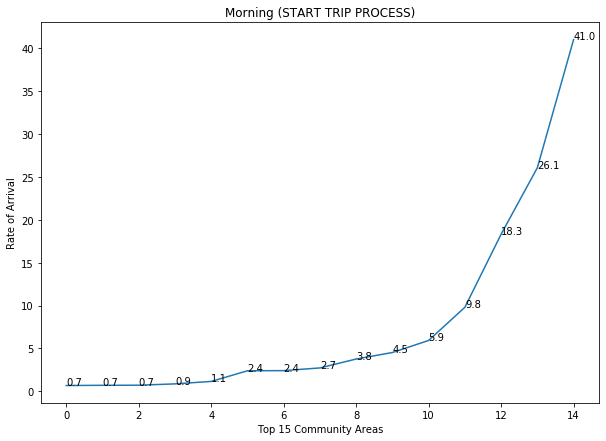

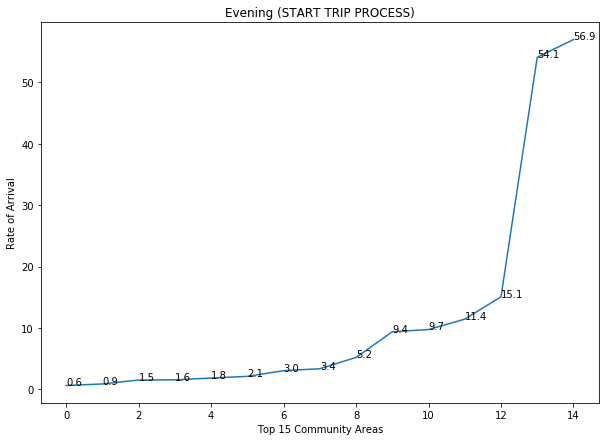

In [23]:
# plot for rate of arrival (START TRIP PROCESS)


morning_y = [item[1] for item in plot_morning_START]

# Top 15 Areas
morning_y = morning_y[-15:]
morning_x = [i for i in range(15)]
plt.plot(morning_x,morning_y)
for i in range(15):
  plt.annotate(round(morning_y[i],1), (morning_x[i],morning_y[i]))
plt.title('Morning (START TRIP PROCESS)')
plt.xlabel('Top 15 Community Areas')
plt.ylabel('Rate of Arrival')
plt.show()

evening_y = [item[1] for item in plot_evening_START]

# Top 15 Areas
evening_y = evening_y[-15:]
evening_x = [i for i in range(15)]
plt.plot(evening_x,evening_y)
for i in range(15):
  plt.annotate(round(evening_y[i],1), (evening_x[i],evening_y[i]))
plt.title('Evening (START TRIP PROCESS)')
plt.xlabel('Top 15 Community Areas')
plt.ylabel('Rate of Arrival')
plt.show()

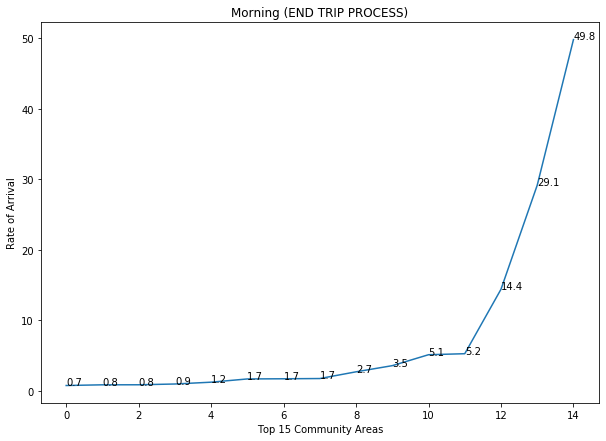

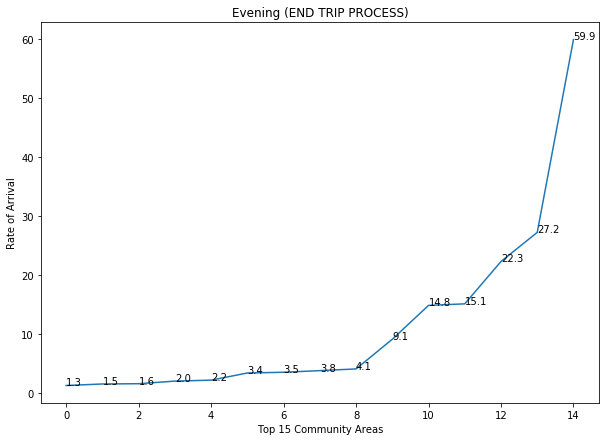

In [24]:
# plot for rate of arrival (END TRIP PROCESS)


morning_y = [item[1] for item in plot_morning_END]

# Top 15 Areas
morning_y = morning_y[-15:]
morning_x = [i for i in range(15)]
plt.plot(morning_x,morning_y)
for i in range(15):
  plt.annotate(round(morning_y[i],1), (morning_x[i],morning_y[i]))
plt.title('Morning (END TRIP PROCESS)')
plt.xlabel('Top 15 Community Areas')
plt.ylabel('Rate of Arrival')
plt.show()

evening_y = [item[1] for item in plot_evening_END]

# Top 15 Areas
evening_y = evening_y[-15:]
evening_x = [i for i in range(15)]
plt.plot(evening_x,evening_y)
for i in range(15):
  plt.annotate(round(evening_y[i],1), (evening_x[i],evening_y[i]))
plt.title('Evening (END TRIP PROCESS)')
plt.xlabel('Top 15 Community Areas')
plt.ylabel('Rate of Arrival')
plt.show()

In [0]:
def avgDistance(area, Data):
  data = Data[Data['Pickup Community Area']==area]
  mean = data['Trip Miles'].mean(axis=0)
  return mean

In [0]:
# Retrieve list of all community areas (Morning)
Areas = MorningData['Pickup Community Area'].unique()

# Compute average distances of rides from each Area (Morning)
Morning_areaDistances = {}
for area in Areas:
  Morning_areaDistances[area] = avgDistance(area,MorningData)

# Retrieve list of all community areas (Evening)
Areas = EveningData['Pickup Community Area'].unique()

# Compute average distances of rides from each Area (Evening)
Evening_areaDistances = {}
for area in Areas:
  Evening_areaDistances[area] = avgDistance(area,EveningData)

In [0]:
import operator

# sort distances for all community areas
plot_morning_distances = sorted(Morning_areaDistances.items(), key=operator.itemgetter(1))[:-2]
plot_evening_distances = sorted(Evening_areaDistances.items(), key=operator.itemgetter(1))[:-1]

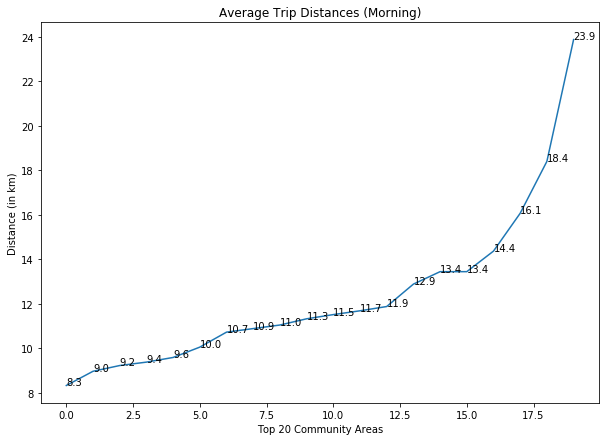

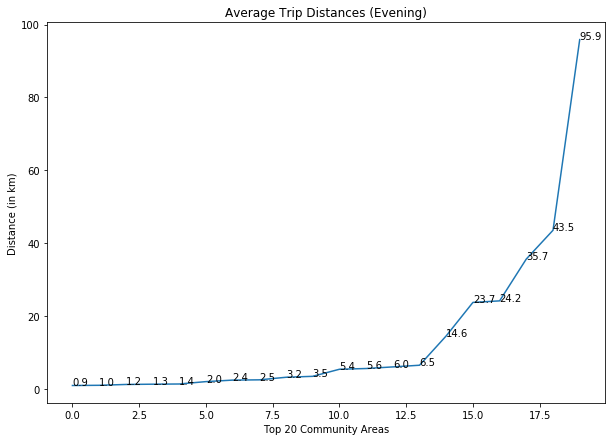

In [28]:
# plot for average Trip Distance 


morning_y = [item[1]*1.6 for item in plot_morning_distances]

# Top 20 Areas
morning_y = morning_y[-20:]
morning_x = [i for i in range(20)]
plt.plot(morning_x,morning_y)
for i in range(20):
  plt.annotate(round(morning_y[i],1), (morning_x[i],morning_y[i]))
plt.title('Average Trip Distances (Morning)')
plt.xlabel('Top 20 Community Areas')
plt.ylabel('Distance (in km)')
plt.show()

evening_y = [item[1]*1.6 for item in plot_evening_END]

# Top 20 Areas
evening_y = evening_y[-20:]
evening_x = [i for i in range(20)]
plt.plot(evening_x,evening_y)
for i in range(20):
  plt.annotate(round(evening_y[i],1), (evening_x[i],evening_y[i]))
plt.title('Average Trip Distances (Evening)')
plt.xlabel('Top 20 Community Areas')
plt.ylabel('Distance (in km)')
plt.show()

In [0]:
Areas = MorningData['Pickup Community Area'].unique()

n = len(Areas)

N_trips_areas_morning = [[0 for i in range(n)] for j in range(n)]

for i in range(n):
  for j in range(n):
    N_trips_areas_morning[i][j] = (MorningData.loc[(MorningData['Pickup Community Area']==Areas[i]) & (MorningData['Dropoff Community Area']==Areas[j])].shape)[0]/total_time

Areas = EveningData['Pickup Community Area'].unique()

n = len(Areas)

N_trips_areas_evening = [[0 for i in range(n)] for j in range(n)]

for i in range(n):
  for j in range(n):
    N_trips_areas_evening[i][j] = (MorningData.loc[(EveningData['Pickup Community Area']==Areas[i]) & (EveningData['Dropoff Community Area']==Areas[j])].shape)[0]/total_time


In [0]:
Pools_Morning = np.array(N_trips_areas_morning)
Pools_Morning = Pools_Morning.flatten()
Pools_Morning.sort()

Pools_Evening = np.array(N_trips_areas_evening)
Pools_Evening = Pools_Evening.flatten()
Pools_Evening.sort()

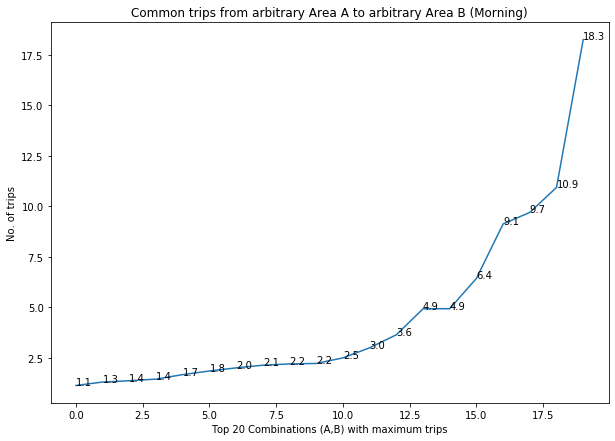

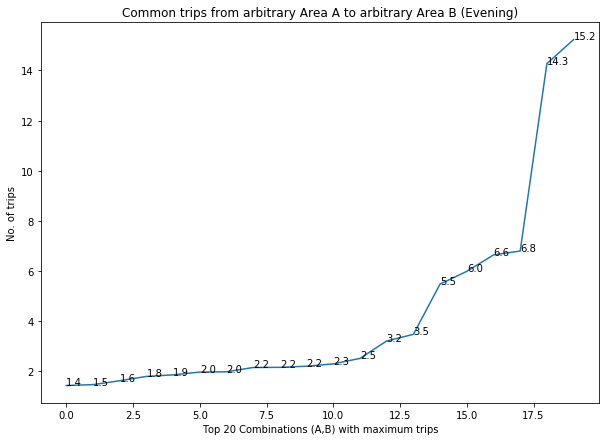

In [31]:
# plot for average Trip Distance 

# Top 20 Areas
Pools_Morning = Pools_Morning[-20:]
x = [i for i in range(20)]
plt.plot(x,Pools_Morning)
for i in range(20):
  plt.annotate(round(Pools_Morning[i],1), (x[i],Pools_Morning[i]))
plt.title('Common trips from arbitrary Area A to arbitrary Area B (Morning)')
plt.xlabel('Top 20 Combinations (A,B) with maximum trips')
plt.ylabel('No. of trips')
plt.show()


# Top 20 Areas
Pools_Evening = Pools_Evening[-20:]
x = [i for i in range(20)]
plt.plot(x,Pools_Evening)
for i in range(20):
  plt.annotate(round(Pools_Evening[i],1), (x[i],Pools_Evening[i]))
plt.title('Common trips from arbitrary Area A to arbitrary Area B (Evening)')
plt.xlabel('Top 20 Combinations (A,B) with maximum trips')
plt.ylabel('No. of trips')
plt.show()